## 1-D Classification

This examples shows how to use linear regression, or ridge regression as a classifier.

In the binary case the RidgeClassifier in sklearn works as follows:

* The classes are transformed to $y = \pm 1$
* A straight line in fit to the data.
* Prediction: if predicted value > 0 then class 1 

In [1]:
from sklearn.linear_model import Ridge, RidgeClassifier, LinearRegression
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
from ipywidgets import *

In [2]:
# Simple 1-D Dataset
y = (-1,-1,-1,1,1,1)
X = np.reshape((20,22,24,26,28,30),(-1,1)) # 6x1 dimensional

In [3]:
rc = RidgeClassifier(alpha=0.1)
rc.fit(X, y)
rc.predict(np.asarray(25))

array([-1])

In [4]:
def plot_func(alpha):
    # The Data
    plt.scatter(X, y, c=(np.asarray(y)), cmap=plt.cm.coolwarm)
    # Fitting the classifier
    rc = RidgeClassifier(alpha=alpha) #For alpha=0 we get the same result as for linear regression
    rc.fit(X=X, y=y)
    # Creating some predictions
    xvals = np.reshape(np.linspace(min(X),max(X),20),(-1,1))
    dec_func_rc = rc.decision_function(xvals)
    plt.plot(xvals, dec_func_rc, 'b')
    
    # Linear Regression for coparison
    lr = LinearRegression() 
    lr.fit(X=X, y=y)
    lr_dec_func = lr.predict(xvals)
    plt.plot(xvals, lr_dec_func, 'g-.')
        
    plt.show()

Linear Regression should be the $\alpha \rightarrow 0$ limit.

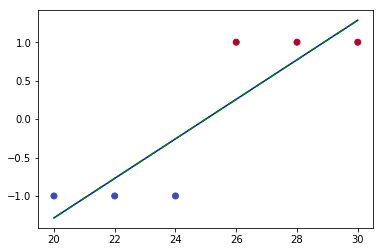

In [5]:
interact(plot_func, alpha=FloatSlider(value=5, min=0, max=200, step=1))

#### For Comparison SVM

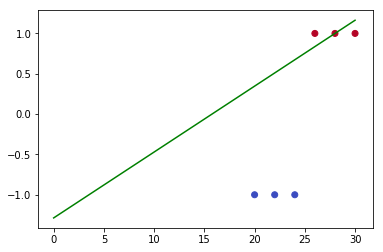

In [6]:
sv = svm.LinearSVC(C=1e10)
sv.fit(X=X, y=y)

xvals = np.reshape(np.linspace(0,max(X),20),(-1,1))
svm_dec_func = sv.decision_function(xvals)
plt.plot(xvals, svm_dec_func, 'g-')
plt.scatter(X, y, c=(np.asarray(y)), cmap=plt.cm.coolwarm)
    